In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

### Read and check dataset

In [2]:
data = pd.read_csv(r"D:\Jupiter_notebook\Training_Project\Data\DS\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Find shape of our dataset

In [3]:
data.shape

(10000, 14)

In [4]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  10000
Number of columns:  14


### Get infomation about our dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check null values in the dataset

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Get overall statistics about the dataset

In [7]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Dropping irrelevant features

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns')

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data = pd.get_dummies(data, drop_first=True)

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Not handling imbalanced

In [14]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
import seaborn as sns

D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


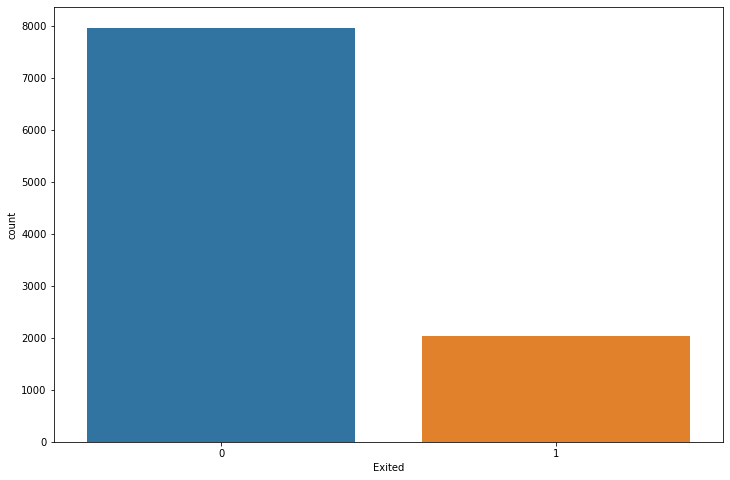

In [16]:
sns.countplot(data['Exited']);

In [17]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [22]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Splitting the dataset into the training set and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,
                                                   random_state=42)

### Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [27]:
X_test

array([[-1.20260995, -1.18569139,  0.03470806, ..., -0.5843575 ,
        -0.44670817, -0.81042351],
       [-0.44320994,  0.00292241, -0.32784892, ...,  1.7112812 ,
        -0.44670817, -0.81042351],
       [ 0.34827739, -0.98758909,  1.48493598, ..., -0.5843575 ,
         2.23859794, -0.81042351],
       ...,
       [ 0.11297034, -0.29423104,  0.39726504, ..., -0.5843575 ,
        -0.44670817, -0.81042351],
       [ 1.09698162,  1.09248506,  0.39726504, ...,  1.7112812 ,
        -0.44670817, -0.81042351],
       [ 0.32688584,  1.98394541,  0.39726504, ..., -0.5843575 ,
         2.23859794, -0.81042351]])

### Logistic Rergression

In [28]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression()

In [29]:
log.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.783427495291902

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score



In [33]:
precision_score(y_test, y_pred1)

0.7698561601000625

In [34]:
recall_score(y_test, y_pred1)

0.7926593689632968

In [35]:
f1_score(y_test, y_pred1)

0.7810913705583756

### SVC

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(X_train, y_train)

SVC()

In [40]:
y_pred2 = svm.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred2)

0.8389830508474576

In [42]:
precision_score(y_test, y_pred2)

0.8278688524590164

### KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred3 = knn.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred3)

0.8182674199623352

In [49]:
precision_score(y_test, y_pred3)

0.7995079950799509

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred4 = dt.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred4)

0.7928436911487758

In [55]:
precision_score(y_test, y_pred4)

0.7727550397067807

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred5 = rf.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred5)

0.8606403013182674

In [62]:
precision_score(y_test, y_pred5)

0.84940138626339

### Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbc = GradientBoostingClassifier()


In [65]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
y_pred6 = gbc.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred6)

0.8433772755806654

In [68]:
precision_score(y_test, y_pred6)

0.8378205128205128

### Sumary result

In [69]:
final_data_acc = pd.DataFrame({"Model":["LR", "SVM", "KNN", "DC", "RD", "GBC"],
                              "Accuracy":[accuracy_score(y_test, y_pred1),
                                         accuracy_score(y_test, y_pred2),
                                         accuracy_score(y_test, y_pred3),
                                         accuracy_score(y_test, y_pred4),
                                         accuracy_score(y_test, y_pred5),
                                         accuracy_score(y_test, y_pred6)]})

In [70]:
final_data_acc

,Model,Accuracy
0,LR,0.783427
1,SVM,0.838983
2,KNN,0.818267
3,DC,0.792844
4,RD,0.860640
5,GBC,0.843377


In [71]:
final_data_pre = pd.DataFrame({"Model":["LR", "SVM", "KNN", "DC", "RF", "GBC"],
                              "Precision":[precision_score(y_test, y_pred1),
                                          precision_score(y_test, y_pred2),
                                          precision_score(y_test, y_pred3),
                                          precision_score(y_test, y_pred4),
                                          precision_score(y_test, y_pred5),
                                          precision_score(y_test, y_pred6)]})

In [72]:
final_data_pre

,Model,Precision
0,LR,0.769856
1,SVM,0.827869
2,KNN,0.799508
3,DC,0.772755
4,RF,0.849401
5,GBC,0.837821


In [73]:
import seaborn as sns

D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


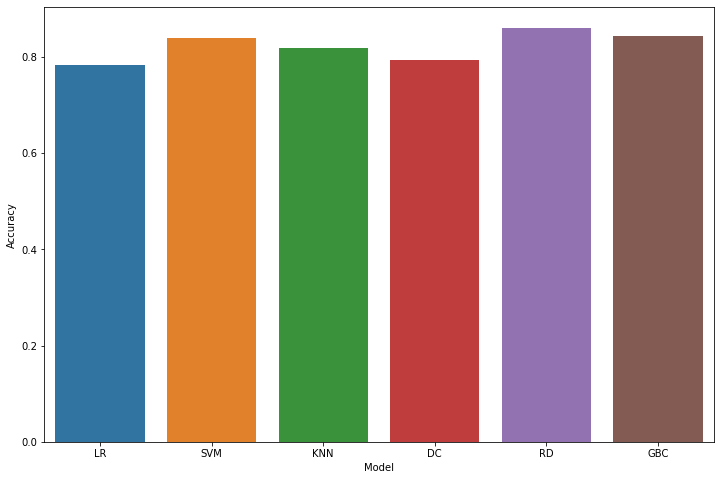

In [74]:
sns.barplot(final_data_acc['Model'], final_data_acc['Accuracy']);

D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


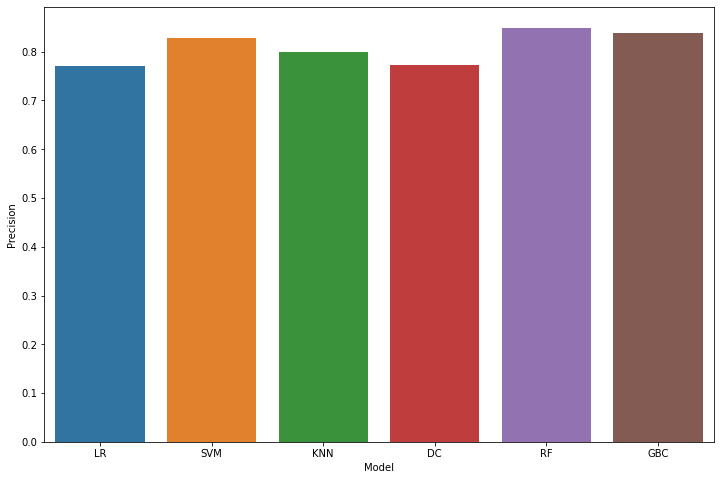

In [75]:
sns.barplot(final_data_pre['Model'], final_data_pre["Precision"]);

### Save the model

In [77]:
X_res = sc.fit_transform(X_res)

In [78]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [79]:
import joblib

In [81]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [82]:
model = joblib.load('churn_predict_model')

In [83]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [84]:

model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

### GUI

In [85]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [91]:
def show_entry_fields():
    p1 = int(e1, get())
    p2 = int(e2, get())
    p3 = int(e3, get())
    p4 = float(e4, get())
    p5 = int(e1, get())
    p6 = int(e2, get())
    p7 = int(e3, get())
    p8 = float(e4, get())
    p9 = int(e9, get())
    
    if p9 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    if p9 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    if p9 == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1
     
    p10 = int(e10, get())
    
    
    model = joblib.load('churn_predict_model')
    
    result = model.predict(sc.transform([[p1, p2, p3, p4,
                                         p5, p6, p7, p8, 
                                         Geography_Germany, Geography_Spain, p10]]))
    
    if result == 0:
        Label(master, text = "No Exit").grid(row=31)
    else:
        Label(master, text = "Exit").grid(row=31)
        
master = Tk()

master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1, sticky='w')
Label(master, text="Age").grid(row=2, sticky='w')
Label(master, text="Tenure").grid(row=3, sticky='w')
Label(master, text="Balance").grid(row=4, sticky='w')
Label(master, text="NumOfProducts").grid(row=5, sticky='w')
Label(master, text="HasCrCard").grid(row=6, sticky='w')
Label(master, text="IsActiveMember").grid(row=7, sticky='w')
Label(master, text="EstimatedSalary").grid(row=8, sticky='w')
Label(master, text="Geography").grid(row=9, sticky='w')
Label(master,text="Gender").grid(row=10, sticky='w')


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()